<a href="https://colab.research.google.com/github/invokeryu/Reconmmendation-System/blob/main/pmf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
import pandas as pd

class pmf():
    def __init__(self, 
          train_list,            # train_list: train data 
          test_list,             # test_list: test data
          N,                     # N:the number of user
          M,                     # M:the number of item
          K=10,                  # K: the number of latent factor
          learning_rate=0.001,   # learning_rate: the learning rata
          lamda_regularizer=0.1, # lamda_regularizer: regularization parameters
          max_iteration=50       # max_iteration: the max iteration
        ):
        self.train_list = train_list
        self.test_list = test_list
        self.N = N
        self.M = M
        self.K = K
        self.learning_rate = learning_rate
        self.lamda_regularizer = lamda_regularizer
        self.max_iteration = max_iteration
    
    
    def train(self):
        P = np.random.normal(0, 0.1, (self.N, self.K))
        Q = np.random.normal(0, 0.1, (self.M, self.K))

        train_mat = sequence2mat(sequence = self.train_list, N = self.N, M = self.M)
        test_mat = sequence2mat(sequence = self.test_list, N = self.N, M = self.M)

        records_list = []
        for step in range(self.max_iteration):
            los=0.0
            for data in self.train_list:
                u,i,r = data
                P[u],Q[i],ls = self.update(P[u], Q[i], r=r, 
                                           learning_rate=self.learning_rate, 
                                           lamda_regularizer=self.lamda_regularizer)
                los += ls
                
            pred_mat = self.prediction(P,Q)
            mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
            records_list.append(np.array([los, mae, rmse, recall, precision]))

            if step % 10 ==0:
                print(' step:%d \n loss:%.4f,mae:%.4f,rmse:%.4f,recall:%.4f,precision:%.4f'
                      %(step,los,mae,rmse,recall,precision))

        print(' end. \n loss:%.4f,mae:%.4f,rmse:%.4f,recall:%.4f,precision:%.4f'
              %(records_list[-1][0],records_list[-1][1],records_list[-1][2],records_list[-1][3],records_list[-1][4]))

        return P, Q, np.array(records_list)


    def update(self, p, q, r, learning_rate=0.001, lamda_regularizer=0.1):
        error = r - np.dot(p, q.T)            
        p = p + learning_rate*(error*q - lamda_regularizer*p)
        q = q + learning_rate*(error*p - lamda_regularizer*q)
        loss = 0.5 * (error**2 + lamda_regularizer*(np.square(p).sum() + np.square(q).sum()))
        return p, q, loss


    def prediction(self, P, Q):
        N,K = P.shape
        M,K = Q.shape

        rating_list=[]
        for u in range(N):
            u_rating = np.sum(P[u,:]*Q, axis=1)
            rating_list.append(u_rating)
        r_pred = np.array(rating_list)
        return r_pred

In [ ]:
def load_data(file_dir):
    # output: 
    # N: the number of user;
    # M: the number of item
    # data: the list of rating information
    user_ids_dict, rated_item_ids_dict = {},{}
    N, M, u_idx, i_idx = 0,0,0,0 
    data = []
    f = open(file_dir)
    for line in f.readlines():
        if '::' in line:
            u, i, r, _ = line.split('::')
        else:
            u, i, r, _ = line.split()
    
        if int(u) not in user_ids_dict:
            user_ids_dict[int(u)]=u_idx
            u_idx+=1
        if int(i) not in rated_item_ids_dict:
            rated_item_ids_dict[int(i)]=i_idx
            i_idx+=1
        data.append([user_ids_dict[int(u)],rated_item_ids_dict[int(i)],float(r)])
    
    f.close()
    N = u_idx
    M = i_idx

    return N, M, data, rated_item_ids_dict
	

def sequence2mat(sequence, N, M):
    # input:
    # sequence: the list of rating information
    # N: row number, i.e. the number of users
    # M: column number, i.e. the number of items
    # output:
    # mat: user-item rating matrix
    records_array = np.array(sequence)
    mat = np.zeros([N,M])
    row = records_array[:,0].astype(int)
    col = records_array[:,1].astype(int)
    values = records_array[:,2].astype(np.float32)
    mat[row,col]=values
    
    return mat


In [ ]:
data_dir = '/content/drive/MyDrive/推荐系统前沿作业/u.data'
     
N, M, data_list, _ = load_data(file_dir=data_dir)
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

learning_rate = 0.005
lamda_regularizer = 0.1
max_iteration = 100
K = 10

train length: 80000 
 test length: 20000


 step:0 
 loss:549112.7440,mae:3.5299,rmse:3.7069,recall:0.0110,precision:0.0233
 step:10 
 loss:65332.1059,mae:0.7851,rmse:0.9985,recall:0.0396,precision:0.0839
 step:20 
 loss:62402.3403,mae:0.7597,rmse:0.9602,recall:0.0396,precision:0.0840
 step:30 
 loss:61182.1163,mae:0.7477,rmse:0.9442,recall:0.0393,precision:0.0832
 step:40 
 loss:60375.6818,mae:0.7407,rmse:0.9354,recall:0.0393,precision:0.0834
 step:50 
 loss:59758.8548,mae:0.7361,rmse:0.9301,recall:0.0392,precision:0.0831
 step:60 
 loss:59277.1088,mae:0.7333,rmse:0.9272,recall:0.0372,precision:0.0790
 step:70 
 loss:58898.3403,mae:0.7318,rmse:0.9258,recall:0.0357,precision:0.0756
 step:80 
 loss:58602.0456,mae:0.7311,rmse:0.9252,recall:0.0342,precision:0.0725
 step:90 
 loss:58372.4596,mae:0.7307,rmse:0.9250,recall:0.0330,precision:0.0699
 end. 
 loss:58210.8595,mae:0.7305,rmse:0.9251,recall:0.0320,precision:0.0679


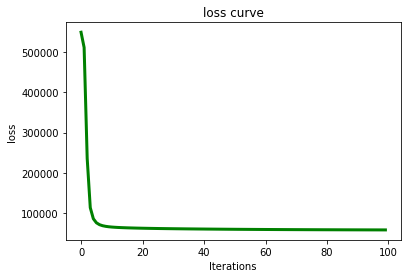

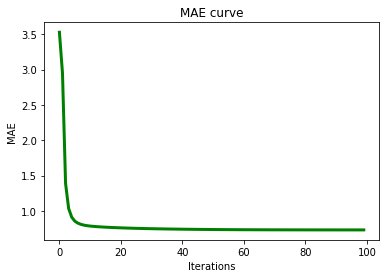

In [ ]:
model = pmf(train_list=train_list, 
            test_list=test_list, 
            N=N, 
            M=M,
            K=K,
            learning_rate=learning_rate, 
            lamda_regularizer=lamda_regularizer, 
            max_iteration=max_iteration)
P, Q, records_array = model.train()
figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pylab import *
import matplotlib
import matplotlib.pyplot as plt

def get_topn(r_pred, train_mat, n=10):
    unrated_items = r_pred * (train_mat==0)
    idx = np.argsort(-unrated_items)
    return idx[:,:n]


def recall_precision(topn, test_mat):
    n,m = test_mat.shape
    hits,total_pred,total_true = 0.,0.,0.
    for u in range(n):
        hits += len([i for i in topn[u,:] if test_mat[u,i]>0])
        size_pred = len(topn[u,:])
        size_true = np.sum(test_mat[u,:]>0,axis=0)
        total_pred += size_pred
        total_true += size_true

    recall = hits/total_true
    precision = hits/total_pred
    return recall, precision	
	
	
def mae_rmse(r_pred, test_mat):
    y_pred = r_pred[test_mat>0]
    y_true = test_mat[test_mat>0]
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse 


def evaluation(pred_mat, train_mat, test_mat):
    topn = get_topn(pred_mat, train_mat, n=10)
    mae, rmse = mae_rmse(pred_mat, test_mat)
    recall, precision = recall_precision(topn, test_mat)
    return mae, rmse, recall, precision
	
	
def get_hit(ranklist,rated_item):
    result = 0
    for item in ranklist:
        if item==rated_item:
            result = 1
    return result
    
    
def get_ndcg(ranklist,rated_item):
    result = 0
    for i in range(len(ranklist)):
        item = ranklist[i]
        if item==rated_item:
            result = math.log(2)/math.log(i+2)
    return result


def hit_ndcg(test_sequence, ranklist):
    length = len(test_sequence)
    hits,ndcgs=[],[]
    for idx in range(length):
        user = test_sequence[idx,0].astype(np.int32)
        rated_item = test_sequence[idx,1].astype(np.int32)
        hr = get_hit(ranklist[user],rated_item)
        ndcg = get_ndcg(ranklist[user],rated_item)
        hits.append(hr)
        ndcgs.append(ndcg)
    #hr,ndcg = np.array(hits).mean(),np.array(ndcgs).mean()
    return hits,ndcgs	
	
	
def figure(values_list, name=''):
    fig=plt.figure(name)
    x = range(len(values_list))
    plot(x, values_list, color='g',linewidth=3)
    plt.title(name + ' curve')
    plt.xlabel('Iterations')
    plt.ylabel(name)
    show()